<a href="https://colab.research.google.com/github/Aayushktyagi/DeepLearning_Resources/blob/master/Grad_CAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
import os
import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import roc_curve, auc
import shutil
import numpy as np
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
tf.compat.v1.disable_eager_execution()
tf.keras.backend.clear_session()

BATCH_SIZE = 32
SEED=0
np.random.seed(SEED)
data_folder='/content/drive/MyDrive/CNNinterpret'

In [3]:
# Loading the model pretrained on ImageNet ~ 4seconds
vgg_model=tf.keras.applications.VGG16(weights='imagenet')

553467904/553467096 [==============================] - 5s 0us/step


In [4]:
def grad_cam(input_model, image, layer_name,H=224,W=224):
    """
    GradCAM method for visualizing input saliency.
    Inputs:
    input_model: keras instance of a deep learning model
    image: input image for which we want to obtain the heatmap
    layer_name: identifier of the last convolutional layer in the network
    H: image height
    W: image width

    Returns:
    A 2-D array of values between the [0,1] range corresponding to the 
    normalized Grad-CAM heatmap values.
    """
    def normalize(x):
        """Utility function to normalize a tensor by its L2 norm"""
        return (x + 1e-10) / (K.sqrt(K.mean(K.square(x))) + 1e-10)

    predicted_class = np.argmax(input_model.predict(image))
    y_c = input_model.output[0, predicted_class]
    conv_output = input_model.get_layer(layer_name).output
    grads = K.gradients(y_c, conv_output)[0]
    grads = normalize(grads)
    gradient_function = K.function([input_model.input], [conv_output, grads])

    output, grads_val = gradient_function([image])
    output, grads_val = output[0, :], grads_val[0, :, :, :]

    weights = np.mean(grads_val, axis=(0, 1))
    cam = np.dot(output, weights)

    cam = np.maximum(cam, 0) 
    cam = cv2.resize(cam, (H, W))
    cam = cam / cam.max()
    return cam

--2021-06-29 11:29:48--  https://zenodo.org/record/4669282/files/elephant.jpg
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1167136 (1.1M) [image/jpeg]
Saving to: ‘elephant.jpg’

elephant.jpg        100%[===================>]   1.11M   587KB/s    in 1.9s    

2021-06-29 11:29:52 (587 KB/s) - ‘elephant.jpg’ saved [1167136/1167136]



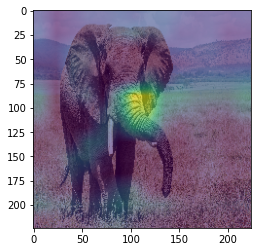

In [5]:
# ELEPHANT
!wget https://zenodo.org/record/4669282/files/elephant.jpg
#!mv elephant.jpg /content/drive/MyDrive/CNNinterpret/
img = tf.keras.preprocessing.image.load_img('/content/elephant.jpg', target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.vgg16.preprocess_input(x)
hmap=grad_cam(vgg_model, x, 'block5_conv3', H=224, W=224)
plt.imshow(img)
plt.imshow(hmap, alpha=0.6)

--2021-06-29 11:30:09--  https://zenodo.org/record/4669282/files/hummingbird.jpg
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21401 (21K) [image/jpeg]
Saving to: ‘hummingbird.jpg’

hummingbird.jpg     100%[===================>]  20.90K  --.-KB/s    in 0.1s    

2021-06-29 11:30:10 (198 KB/s) - ‘hummingbird.jpg’ saved [21401/21401]



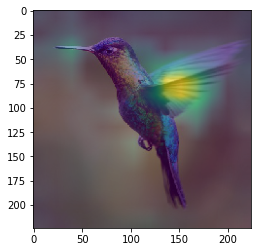

In [6]:
# HUMMINGBIRD
!wget https://zenodo.org/record/4669282/files/hummingbird.jpg
img = tf.keras.preprocessing.image.load_img('/content/hummingbird.jpg', target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.vgg16.preprocess_input(x)
hmap=grad_cam(vgg_model, x, 'block5_conv3', H=224, W=224)
plt.imshow(img)
plt.imshow(hmap, alpha=0.6)